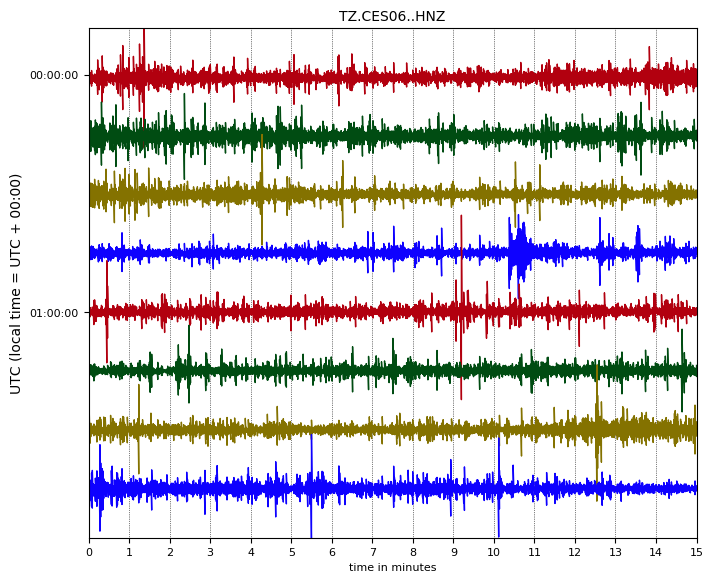

In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# OR 10.254.145.79
client = Client("http://10.254.144.226/")
t = UTCDateTime("2016-06-15T00:00:00.000")
st = client.get_waveforms("TZ", "CES06", "", "HNZ", t, t + 60*120)
st.plot(type="dayplot")  

In [99]:
wf = st[0]
wf_filt = wf.copy()
wf_filt.filter('lowpass', freq=3.0, corners=2, zerophase=True)

TZ.CES06..HNZ | 2016-06-15T00:00:00.000000Z - 2016-06-15T02:00:00.000000Z | 200.0 Hz, 1440001 samples

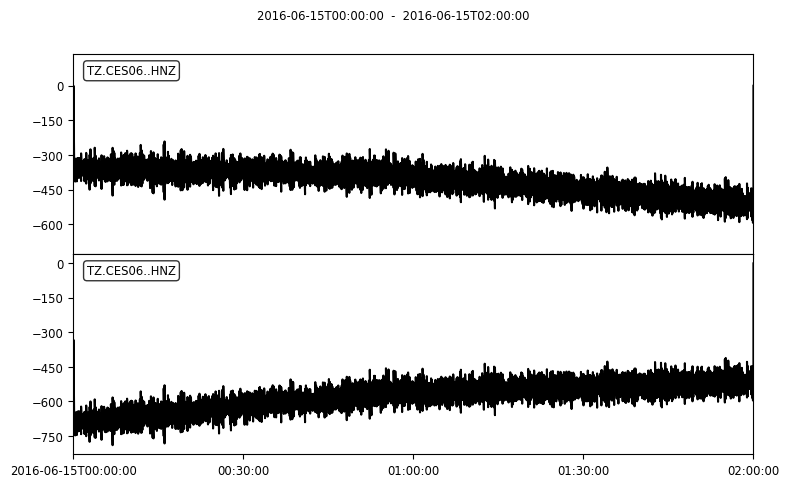

In [100]:
from obspy import Stream
wf_filt_det = wf_filt.copy().detrend()
stream = Stream(traces=[wf_filt, wf_filt_det])
stream.plot()

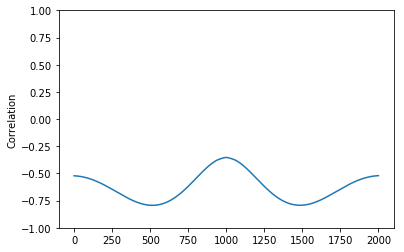

In [101]:

from obspy.signal import cross_correlation as cc
import matplotlib.pyplot as plt
correlation = cc.correlate(wf_filt, wf_filt_det, shift=1000)
plt.plot(correlation)
plt.ylabel('Correlation')

axes = plt.gca()
axes.set_ylim([-1,1])

plt.show()
